## Análisis de la Agricultura en Bangladesh

Vamos a tratar de entender la fertilidad del suelo, las condiciones climatias y los tipos de cultivos de Bangladesh. Según las distintias características del suelo, la temperatura y la lluvia trataremos de predecir que tipon de cultivo es mejor cultivar. Para ello utilizaremos modelos de clasificación como el Random Forest. 

In [674]:
### TENEMOS UN CAS0 DE OVERFITTING (Sobreajuste) DEL MODELO. En los datos de testeo el accuracy es del 14% y en el de entrenamiento del 100% #####

In [675]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [676]:
# Carga de datos
data = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/PYTHON PROJECTS/PROYECTOS/Agricultura Bangladesh/bangladesh_divisions_dataset.csv")
data.head(5)

,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season,Satellite_Observation_Date,Remarks
0,Sylhet,Loamy,62,Agricultural,72,28.6,Wheat,Monsoon,2024-09-24,Requires attention
1,Dhaka,Sandy,63,Unused,118,23.8,Maize,Autumn,2024-01-31,Moderate potential
2,Rangpur,Peaty,51,Agricultural,106,32.0,Maize,Autumn,2024-03-11,Requires attention
3,Khulna,Sandy,67,Barren,336,31.6,Wheat,Autumn,2024-09-29,Low potential
4,Rangpur,Peaty,63,Agricultural,237,20.1,Rice,Winter,2024-04-01,Moderate potential


In [677]:
# Eliminamos variables innecesarias
data.drop(["Remarks","Satellite_Observation_Date"],inplace=True,axis=1)
data

,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season
0,Sylhet,Loamy,62,Agricultural,72,28.6,Wheat,Monsoon
1,Dhaka,Sandy,63,Unused,118,23.8,Maize,Autumn
2,Rangpur,Peaty,51,Agricultural,106,32.0,Maize,Autumn
3,Khulna,Sandy,67,Barren,336,31.6,Wheat,Autumn
4,Rangpur,Peaty,63,Agricultural,237,20.1,Rice,Winter
...,...,...,...,...,...,...,...,...
1995,Barishal,Loamy,65,Unused,278,20.3,Spices,Summer
1996,Chattogram,Clay,52,Residential,224,29.3,Jute,Winter
1997,Rangpur,Clay,97,Barren,84,25.6,Jute,Summer
1998,Rajshahi,Sandy,85,Residential,209,23.5,Rice,Summer


##### Variables 

* Location = Situación geográfica de la tierra
* Soil_type = Tipo del suelo en el área
* Fertility_Index = Rankign de la fetilidad de 40 a 100 indicando el potencial agrícola de la tierra.
* Land_Use_Type = El uso actual de la tierra.
* Average_Rainfall = Media de llvuias anuales en mililitros.
* Temperature = Media de la temperatura de la región en Celsius.
* Crop_Suitabiliy = Cultivo de la región 
* Season =  Estación del año preferible para la plantación del cutlivo.

In [679]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Location              2000 non-null   object 
 1   Soil_Type             2000 non-null   object 
 2   Fertility_Index       2000 non-null   int64  
 3   Land_Use_Type         2000 non-null   object 
 4   Average_Rainfall(mm)  2000 non-null   int64  
 5   Temperature(°C)       2000 non-null   float64
 6   Crop_Suitability      2000 non-null   object 
 7   Season                2000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 125.1+ KB


In [680]:
# Variables descriptivas de las variables numéricas del dataset
data.describe()

,Fertility_Index,Average_Rainfall(mm),Temperature(°C)
count,2000.00000,2000.000000,2000.000000
mean,70.10450,223.136000,27.330250
std,17.97699,100.548543,4.341251
min,40.00000,50.000000,20.000000
25%,54.00000,137.000000,23.500000
50%,70.00000,222.500000,27.300000
75%,86.00000,308.000000,31.000000
max,100.00000,400.000000,35.000000


In [681]:
# Existencia valores nulos
data.isnull().sum()

Location                0
Soil_Type               0
Fertility_Index         0
Land_Use_Type           0
Average_Rainfall(mm)    0
Temperature(°C)         0
Crop_Suitability        0
Season                  0
dtype: int64

#### Visualización de datos

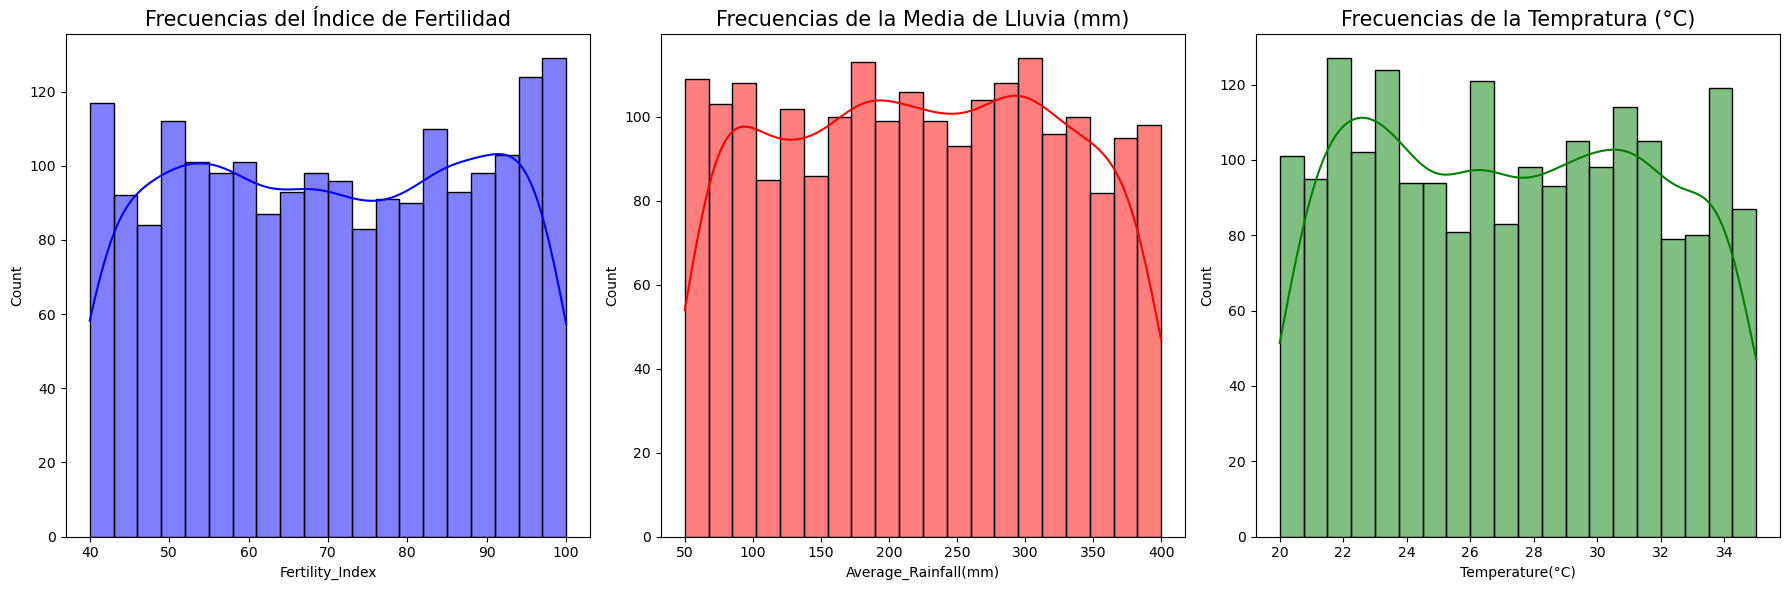

In [683]:
# Visualización de datos de los datos numéricos, distribución de cada una de las variables

# Estilo de los graficos
# Figura y cuadrícula para los subgráficos 
fig,axes = plt.subplots(1,3,figsize=(18,6))

# Histograma de Fertility_Index
sns.histplot(data["Fertility_Index"],kde=True,bins=20,color="blue",ax=axes[0])
axes[0].set_title("Frecuencias del Índice de Fertilidad",fontsize=15)

# Histograma de Average_Rainfall(mm)
sns.histplot(data["Average_Rainfall(mm)"],kde=True,bins=20,color="red",ax=axes[1])
axes[1].set_title("Frecuencias de la Media de Lluvia (mm)",fontsize=15)

# Histograma de Temperature(°C)
sns.histplot(data["Temperature(°C)"],kde=True,bins=20,color="green",ax=axes [2])
axes[2].set_title("Frecuencias de la Tempratura (°C)",fontsize=15)

plt.tight_layout()
plt.show()


Podemos concluir que no hay valores sesgados, pues no hay ninguna de las variables numéricas que se concentre en un extremo u otro.

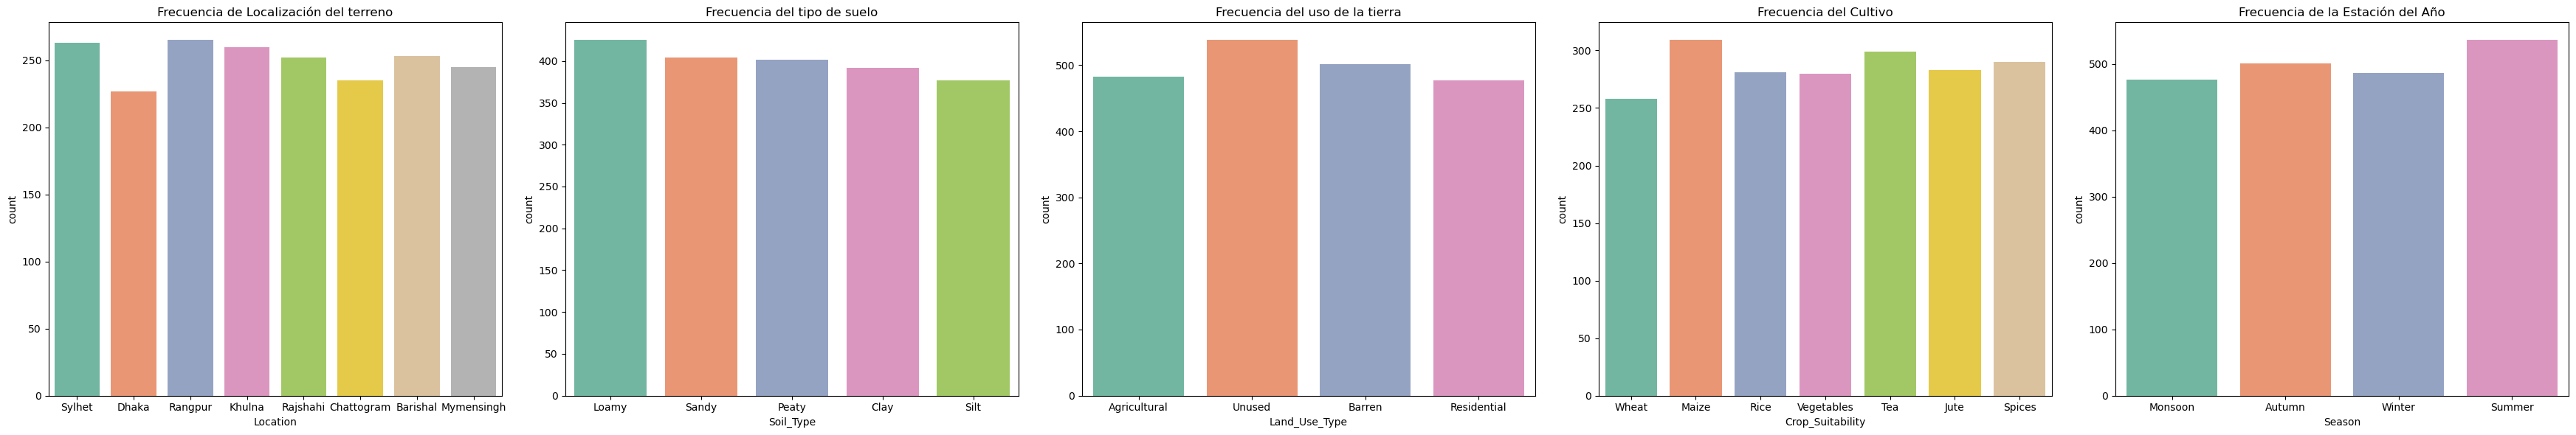

In [685]:
# Visualización de los datos no numéricos 
fig,axes = plt.subplots(1,5,figsize=(35,6))

# Lozalización del terreno
sns.countplot(x=data["Location"],palette="Set2",ax=axes[0])
axes[0].set_title("Frecuencia de Localización del terreno")

# Tipo de suelo
sns.countplot(x=data["Soil_Type"],palette="Set2",ax=axes[1])
axes[1].set_title("Frecuencia del tipo de suelo")

# Uso de la tierra
sns.countplot(x=data["Land_Use_Type"],palette="Set2",ax=axes[2])
axes[2].set_title("Frecuencia del uso de la tierra")

# Cultivo
sns.countplot(x=data["Crop_Suitability"],palette="Set2",ax=axes[3])
axes[3].set_title("Frecuencia del Cultivo")

# Estación del Año
sns.countplot(x=data["Season"],palette="Set2",ax=axes[4])
axes[4].set_title("Frecuencia de la Estación del Año")

plt.tight_layout()
plt.show()

Podemos concluir que no hay valores sesgados, pues no hay ninguna de las variables numéricas que se concentre en un extremo u otro.

#### Transformación variables categóricas

In [688]:
# Creamos cada una de las variables categoricas como valores binarias tomando 1 si coincide y 0 si no. Menos la variable que vamos a explicar.
categoricas = data[["Location","Soil_Type","Land_Use_Type","Season"]]
categoricas = pd.get_dummies(categoricas).astype(int)
categoricas

,Location_Barishal,Location_Chattogram,Location_Dhaka,Location_Khulna,Location_Mymensingh,Location_Rajshahi,Location_Rangpur,Location_Sylhet,Soil_Type_Clay,Soil_Type_Loamy,...,Soil_Type_Sandy,Soil_Type_Silt,Land_Use_Type_Agricultural,Land_Use_Type_Barren,Land_Use_Type_Residential,Land_Use_Type_Unused,Season_Autumn,Season_Monsoon,Season_Summer,Season_Winter
0,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1996,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1997,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1998,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [689]:
# Eliminamos las variables categoricas del dataset inicial
data_numericas = data.drop(["Location","Soil_Type","Land_Use_Type","Season"],axis=1)
data_numericas.head(5)

,Fertility_Index,Average_Rainfall(mm),Temperature(°C),Crop_Suitability
0,62,72,28.6,Wheat
1,63,118,23.8,Maize
2,51,106,32.0,Maize
3,67,336,31.6,Wheat
4,63,237,20.1,Rice


In [690]:
# Concatenamos data set inicial sin variables categoricas y dataset de categoricas con variables binarias.
data_1 = pd.concat([data_numericas,categoricas],axis=1)
data_1

,Fertility_Index,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Location_Barishal,Location_Chattogram,Location_Dhaka,Location_Khulna,Location_Mymensingh,Location_Rajshahi,...,Soil_Type_Sandy,Soil_Type_Silt,Land_Use_Type_Agricultural,Land_Use_Type_Barren,Land_Use_Type_Residential,Land_Use_Type_Unused,Season_Autumn,Season_Monsoon,Season_Summer,Season_Winter
0,62,72,28.6,Wheat,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,63,118,23.8,Maize,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,51,106,32.0,Maize,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,67,336,31.6,Wheat,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
4,63,237,20.1,Rice,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,65,278,20.3,Spices,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1996,52,224,29.3,Jute,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1997,97,84,25.6,Jute,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1998,85,209,23.5,Rice,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


#### Preprocesamiento de los datos

In [692]:
X = data_1.drop(["Crop_Suitability"],axis=1)
y = data_1["Crop_Suitability"]

In [693]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.2,random_state=2)

#### Entrenamiento del modelo

In [695]:
modelo = RandomForestClassifier(min_samples_split=2,max_features =25,n_estimators =100,max_depth=None,class_weight='balanced')

In [696]:
modelo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=25)

#### Evaluación del modelo

In [698]:
X_train_prediccion = modelo.predict(X_train)
X_train_prediccion

array(['Jute', 'Wheat', 'Spices', ..., 'Jute', 'Maize', 'Wheat'],
      dtype=object)

In [699]:
train_data_accuracy = accuracy_score(X_train_prediccion, y_train)
train_data_accuracy

1.0

In [700]:
X_test_prediccion = modelo.predict(X_test)
X_test_prediccion

array(['Tea', 'Rice', 'Jute', 'Rice', 'Maize', 'Spices', 'Maize', 'Maize',
       'Rice', 'Spices', 'Maize', 'Maize', 'Maize', 'Spices', 'Wheat',
       'Jute', 'Spices', 'Tea', 'Jute', 'Maize', 'Maize', 'Vegetables',
       'Rice', 'Rice', 'Tea', 'Maize', 'Rice', 'Jute', 'Spices', 'Spices',
       'Wheat', 'Wheat', 'Rice', 'Rice', 'Spices', 'Tea', 'Spices',
       'Spices', 'Maize', 'Vegetables', 'Vegetables', 'Maize', 'Maize',
       'Spices', 'Tea', 'Spices', 'Wheat', 'Maize', 'Rice', 'Wheat',
       'Tea', 'Rice', 'Spices', 'Tea', 'Jute', 'Jute', 'Maize', 'Spices',
       'Maize', 'Rice', 'Maize', 'Jute', 'Wheat', 'Wheat', 'Vegetables',
       'Vegetables', 'Rice', 'Vegetables', 'Jute', 'Rice', 'Rice', 'Rice',
       'Vegetables', 'Jute', 'Spices', 'Spices', 'Tea', 'Spices', 'Maize',
       'Maize', 'Rice', 'Tea', 'Wheat', 'Tea', 'Spices', 'Tea', 'Spices',
       'Rice', 'Maize', 'Maize', 'Vegetables', 'Tea', 'Spices', 'Maize',
       'Maize', 'Vegetables', 'Rice', 'Tea', 'Rice', '

In [701]:
test_data_accuracy = accuracy_score(X_test_prediccion, y_test)
test_data_accuracy

0.1575

Esta evaluación del modelo nos está indicando que existe un problema de sobreajuste, pues el modelo esta aprendiendo perfectamente de los datos de entrenamiento (accuracy ratio del 1) y falla al intentar predecir correctamente los datos que no ha visto (test) (accuracy rario 0,165). 

Esto se debe en nuestro modelo a la dimensionalidad alta con pocos datos. Es decir tenemos un dataset con muchas características en comparación con el número de observaciones. 

Vayamos a demostrarlo eliminando alguna de las características:

Imaginemos que realizamos de nuevo el modelo intentano predecir el cultivo que mejor se ajusta en función de la temperatura, el fertility_indez y el Average_Rainfall. Entonces debemos usar las variables numéricas.

In [705]:
# Mostramos datos que usaremos
data_numericas.head(5)

,Fertility_Index,Average_Rainfall(mm),Temperature(°C),Crop_Suitability
0,62,72,28.6,Wheat
1,63,118,23.8,Maize
2,51,106,32.0,Maize
3,67,336,31.6,Wheat
4,63,237,20.1,Rice


 #### Preprocesamiento de los datos

In [707]:
X = data_numericas.drop("Crop_Suitability",axis=1)
y = data_numericas["Crop_Suitability"]

In [708]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.2,random_state=2)

#### Entrenamiento modelo

In [710]:
modelo_2 = RandomForestClassifier()

In [711]:
modelo_2.fit(X_train,y_train)

RandomForestClassifier()

#### Evaluación del modelo

In [713]:
X_train_predicciones = modelo_2.predict(X_train)
X_train_predicciones

array(['Jute', 'Wheat', 'Spices', ..., 'Jute', 'Maize', 'Wheat'],
      dtype=object)

In [714]:
train_data_accuracy = accuracy_score(X_train_prediccion,y_train)
train_data_accuracy

1.0

In [715]:
X_test_predicciones = modelo_2.predict(X_test)
X_test_predicciones

array(['Maize', 'Maize', 'Wheat', 'Rice', 'Tea', 'Vegetables',
       'Vegetables', 'Tea', 'Wheat', 'Maize', 'Maize', 'Spices', 'Maize',
       'Spices', 'Tea', 'Tea', 'Wheat', 'Spices', 'Wheat', 'Maize',
       'Spices', 'Maize', 'Maize', 'Rice', 'Tea', 'Vegetables', 'Jute',
       'Tea', 'Rice', 'Maize', 'Wheat', 'Jute', 'Rice', 'Rice', 'Tea',
       'Spices', 'Spices', 'Spices', 'Spices', 'Maize', 'Maize', 'Tea',
       'Maize', 'Wheat', 'Wheat', 'Spices', 'Vegetables', 'Tea', 'Rice',
       'Spices', 'Rice', 'Wheat', 'Maize', 'Tea', 'Spices', 'Jute',
       'Maize', 'Spices', 'Maize', 'Rice', 'Maize', 'Rice', 'Rice',
       'Spices', 'Spices', 'Vegetables', 'Wheat', 'Vegetables', 'Jute',
       'Wheat', 'Spices', 'Spices', 'Maize', 'Rice', 'Vegetables',
       'Wheat', 'Spices', 'Spices', 'Maize', 'Jute', 'Rice', 'Jute',
       'Spices', 'Jute', 'Spices', 'Maize', 'Spices', 'Rice', 'Spices',
       'Maize', 'Vegetables', 'Jute', 'Vegetables', 'Jute', 'Tea', 'Tea',
       'Rice', 'T

In [716]:
test_data_accuracy = accuracy_score(X_test_prediccion,y_test)
test_data_accuracy

0.1575

Puesto que el problema persiste, y hemos probado todas las soluciones posibles para mejorar el accuracy ratio de nuestro modelo (Desbalanceo de clases, Ajuste de hiperparámetros, y evalauciones adecuadas como classification_report), podemos concluir que el modelo RandomForestClassifier no es el más adecuado para nuestro propósito.